In [44]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

Found 400 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 100 files belonging to 2 classes.


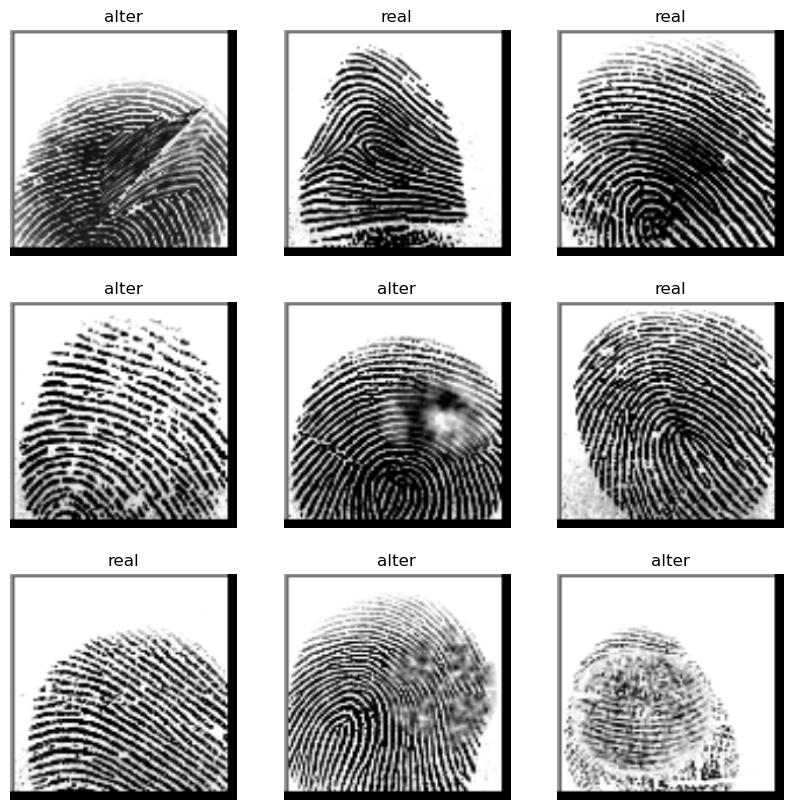

In [46]:
# Displaying dataset
img_size=(224,224)
batch_size=32
train_ds = image_dataset_from_directory('C://Users//tatba//OneDrive//Desktop//Dataset//Fingerprintscan//Train',
                                        labels="inferred",
                                        label_mode="int",
                                        seed=123,
                                        image_size=img_size,
                                        batch_size=batch_size)

test_ds=image_dataset_from_directory('C://Users//tatba//OneDrive//Desktop//Dataset//Fingerprintscan//Test',
                                     labels="inferred",
                                     label_mode="int",
                                     seed=123,
                                     image_size=img_size,
                                     batch_size=batch_size)

validation_ds =image_dataset_from_directory('C://Users//tatba//OneDrive//Desktop//Dataset//Fingerprintscan//Validation',
                                            labels="inferred",
                                            label_mode="int",
                                            seed=123,
                                            image_size=img_size,
                                            batch_size=batch_size)

data_cat=train_ds.class_names

plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(data_cat[labels[i]])
        plt.axis("off")


In [48]:
# ImageDataGenerator for loading images
trainds=ImageDataGenerator(rescale=1./255)
testds=ImageDataGenerator(rescale=1./255)
validationds=ImageDataGenerator(rescale=1./255)

In [50]:
print(data_cat)

['alter', 'real']


In [52]:
# Data generators
train_generator = trainds.flow_from_directory('C://Users//tatba//OneDrive//Desktop//Dataset//Fingerprintscan//Train', target_size=(img_size),
                                                    batch_size=batch_size, class_mode='categorical')

test_generator = testds.flow_from_directory('C://Users//tatba//OneDrive//Desktop//Dataset//Fingerprintscan//Test', target_size=(img_size),
                                                   batch_size=batch_size, class_mode='categorical')

validation_generator = validationds.flow_from_directory('C://Users//tatba//OneDrive//Desktop//Dataset//Fingerprintscan//Validation', target_size=(img_size),
                                                         batch_size=batch_size, class_mode='categorical')

Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [54]:
class_indices = train_generator.class_indices
print(class_indices)

{'alter': 0, 'real': 1}


In [72]:
# Define the VGG19 model with pre-trained ImageNet weights
resnet50_model = ResNet50(weights='imagenet',include_top=False,input_shape=(224, 224, 3))

# Freeze the base model layers to prevent training them
for layer in resnet50_model.layers:
    layer.trainable = False

# Add custom classification layers
x = resnet50_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Adding dropout for regularization
output = Dense(2, activation='sigmoid')(x)  # Sigmoid activation for binary classification

# Create the final model
resnet50_model = Model(inputs=resnet50_model.input, outputs=output)

In [73]:
resnet50_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 49,278,594 (187.98 MB)

 Trainable params: 25,690,882 (98.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [76]:
# Compile the model
resnet50_model.compile(optimizer='adam',
loss=tf.keras.losses.CategoricalCrossentropy(),
metrics=['accuracy'])

In [78]:
# Train the model
history = resnet50_model.fit(train_generator, epochs=30, validation_data=validation_generator)

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.5117 - loss: 11.3475 - val_accuracy: 0.5000 - val_loss: 8.4689
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.5117 - loss: 5.1607 - val_accuracy: 0.5700 - val_loss: 1.0994
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.6275 - loss: 0.9941 - val_accuracy: 0.5500 - val_loss: 0.6834
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.6518 - loss: 0.6391 - val_accuracy: 0.5400 - val_loss: 0.6917
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.6332 - loss: 0.6318 - val_accuracy: 0.5700 - val_loss: 0.6882
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.6477 - loss: 0.6014 - val_accuracy: 0.5800 - val_loss: 0.7011
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.6005 - loss: 0.5964 - val_accuracy: 0.6000 - val_loss: 0.7111
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.6877 - loss: 0.5765 - val_accuracy: 0.5900 - val_loss

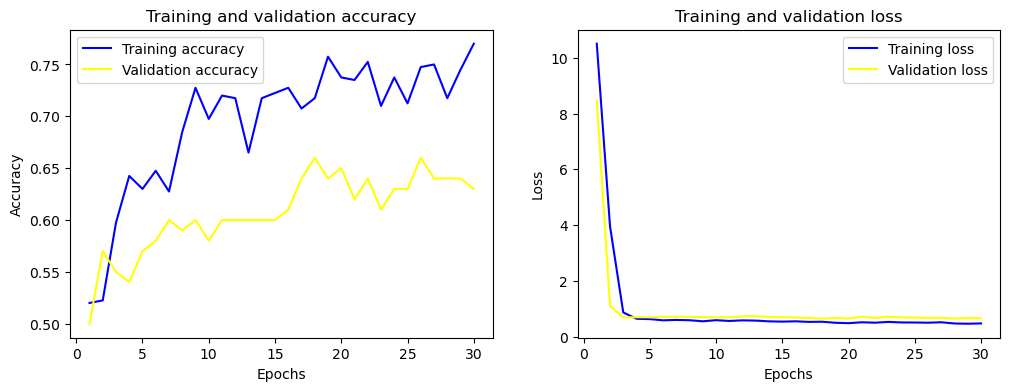

In [79]:
# Plot training & validation accuracy/loss
def plot_accuracy_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc,color='blue', label='Training accuracy')
    plt.plot(epochs, val_acc,color='yellow', label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss,color='blue', label='Training loss')
    plt.plot(epochs, val_loss,color='yellow', label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_accuracy_loss(history)

In [80]:
# Predict and evaluate the model
y_pred = resnet50_model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

y_actual =test_generator.classes

7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step


Confusion Matrix
[[39 61]
 [40 60]]
Classification Report
              precision    recall  f1-score   support

     Altered       0.49      0.39      0.44       100
        Real       0.50      0.60      0.54       100

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200



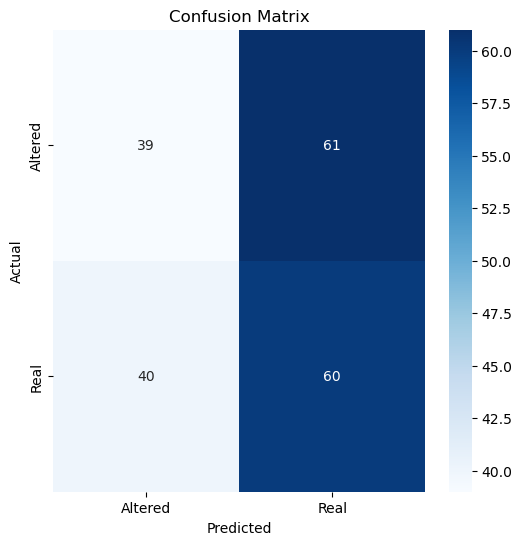

In [81]:
# Confusion matrix and classification report
cm = confusion_matrix(y_actual, y_pred)
clr = classification_report(y_actual, y_pred, target_names=['Altered', 'Real'])

print("Confusion Matrix")
print(cm)
print("Classification Report")
print(clr)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Altered', 'Real'], yticklabels=['Altered', 'Real'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

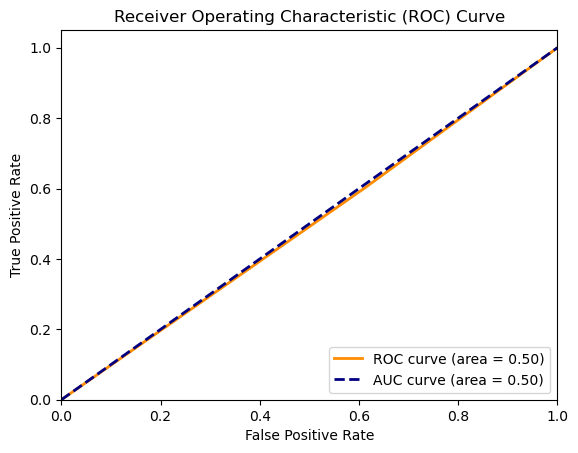

In [82]:
# ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_actual, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',label='AUC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()